In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Print the shapes to verify
print(f"Shape of train_images: {train_images.shape}")
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Shape of test_images: {test_images.shape}")
print(f"Shape of test_labels: {test_labels.shape}")

Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


In [13]:
# Normalization
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [14]:
print('Number of images in the training dataset: ', train_images.shape[0])
print('Number of images in the testing dataset: ', test_images.shape[0])

Number of images in the training dataset:  60000
Number of images in the testing dataset:  10000


In [15]:
print(f"shape of the images in the training dataset: {train_images[0].shape}")

shape of the images in the training dataset: (28, 28)


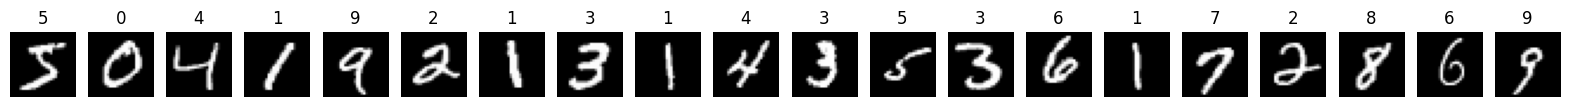

In [16]:
fig, axes = plt.subplots(1, 20, figsize=(20,20))
for i in range(20):
    axes[i].imshow(train_images[i].reshape(28,28), cmap='gray')
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.show()

In [17]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_images,
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9285 - loss: 0.2413
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9686 - loss: 0.1017
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9776 - loss: 0.0716
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9822 - loss: 0.0558
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9864 - loss: 0.0414


In [19]:
def view_classify(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_title('Class probability')
    ax2.set_xlim(0,1.1)
    plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


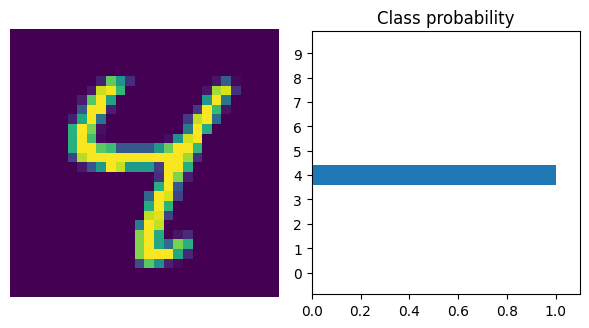

In [20]:
image, label = test_images[6], test_labels[6]
propabilities = model.predict(image.reshape(1,28,28,1))
view_classify(image, propabilities[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


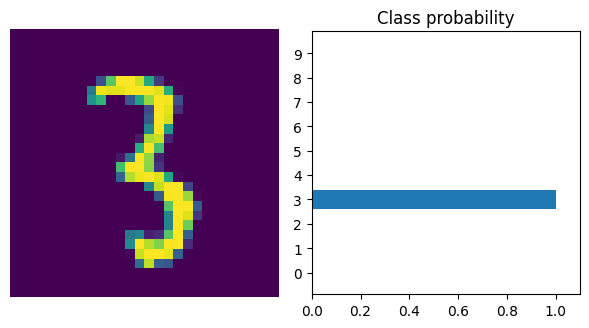

In [21]:
image2, label = test_images[669], test_labels[669]
propabilities2 = model.predict(image2.reshape(1,28,28,1))
view_classify(image2, propabilities2[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


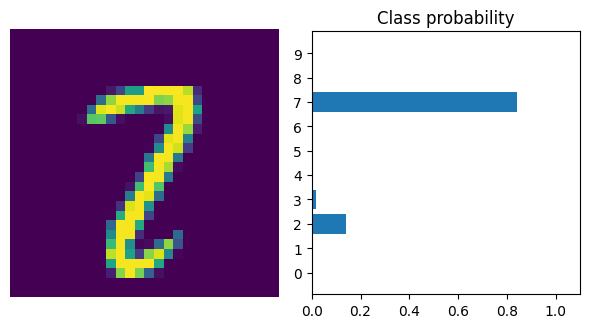

In [24]:
image3, label = test_images[321], test_labels[321]
propabilities3 = model.predict(image3.reshape(1,28,28,1))
view_classify(image3, propabilities3[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


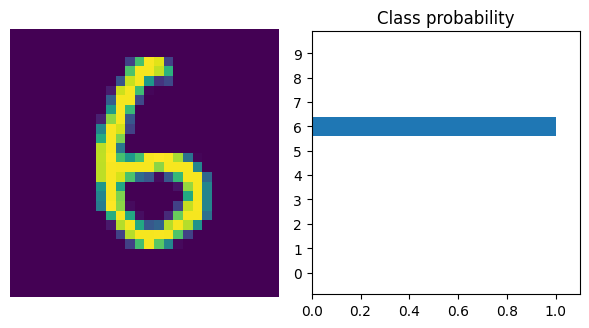

In [25]:
image4, label = test_images[21], test_labels[21]
propabilities4 = model.predict(image4.reshape(1,28,28,1))
view_classify(image4, propabilities4[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


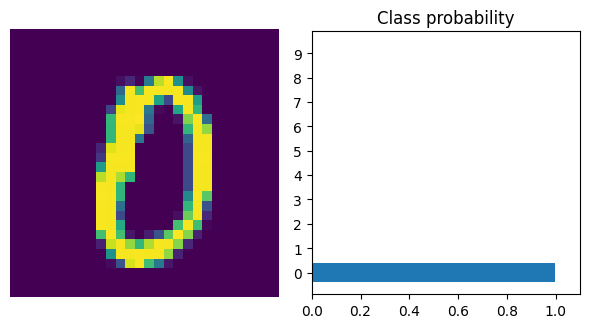

In [27]:
image5, label = test_images[55], test_labels[55]
propabilities5 = model.predict(image5.reshape(1,28,28,1))
view_classify(image5, propabilities5[0])

In [22]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy *100:.2f}%')
print(f'Loss of the neural network on the {test_images.shape[0]} test images: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.0776
Accuracy of the neural network on the 10000 test images: 97.78%
Loss of the neural network on the 10000 test images: 0.07763933390378952
